# Các phương pháp Runge Kutta giải phương trình vi phân với điều kiện ban đầu

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Input

In [36]:
# Hàm số f(x, y)
# giá trị ban đầu: x0, y0
# Số mốc x_k sử dụng: N
# Giá trị X: cần tính giá trị hàm y tại x = X
def Function(x, y):
    return x + y

x0 = 0
y0 = 1
N = 100
X = 5

## Các hàm Runge Kutta s nấc với s = 1, 2, 3, 4

### Runge Kutta một nấc <-> Công thức Euler hiện

In [37]:
def RungeKuttaMotNac(x0, X, y0, N):
    result = []
    h = (X - x0) / (N - 1)
    result.append(y0)
    for i in range(1, N):
        y0 = y0 + h * Function(x0, y0)
        result.append(y0)
        x0 += h
    return result

### Runge Kutta hai nấc thường dùng <-> công thức Euler hình thang

In [38]:
def RungeKuttaHaiNac(x0, X, y0, N):
    result = []
    h = (X - x0) / (N - 1)
    result.append(y0)
    for i in range(1, N):
        yTem = y0 + h * Function(x0, y0)
        y0 = y0 + (h / 2) * (Function(x0, y0) + Function(x0 + h, yTem))
        result.append(y0)
        x0 += h
    return result

### Runge Kutta ba nấc

#### Runge Kutta ba nấc công thức thứ nhất thường dùng 

In [39]:
def RungeKuttaBaNac1(x0, X, y0, N):
    result = []
    result.append(y0)
    h = (X- x0) / (N - 1)
    for i in range(1, N):
        k1 = h * Function(x0, y0)
        k2 = h * Function(x0 + h/2, y0 + k1/2)
        k3 = h * Function(x0 + h, y0 - k1 + 2 * k2)
        y0 = y0 + (k1 + 4 * k2 + k3)/6
        result.append(y0)
        x0 += h
    return result

#### Runge Kutta ba nấc công thức Heun

In [40]:
def RungeKuttaBaNacHeun(x0, X, y0, N):
    result = []
    result.append(y0)
    h = (X- x0) / (N - 1)
    for i in range(1, N):
        k1 = h * Function(x0, y0)
        k2 = h * Function(x0 + h/3, y0 + k1/3)
        k3 = h * Function(x0 + 2 * h / 3, y0 + 2 * k2 / 3)
        y0 = y0 + (k1 + 3 * k3)/4
        result.append(y0)
        x0 += h
    return result

### Runge Kutta bốn nấc thường dùng

In [41]:
def RungeKuttaBonNac(x0, X, y0, N):
    result = []
    result.append(y0)
    h = (X- x0) / (N - 1)
    for i in range(1, N):
        k1 = h * Function(x0, y0)
        k2 = h * Function(x0 + h/2, y0 + k1/2)
        k3 = h * Function(x0 + h/2, y0 + k2/2)
        k4 = h * Function(x0 + h, y0 + k3)
        y0 = y0 + (k1 + 2*k2 + 2*k3 + k4)/6
        result.append(y0)
        x0 += h
    return result

## kết quả chạy chương trình và biểu đồ kết quả

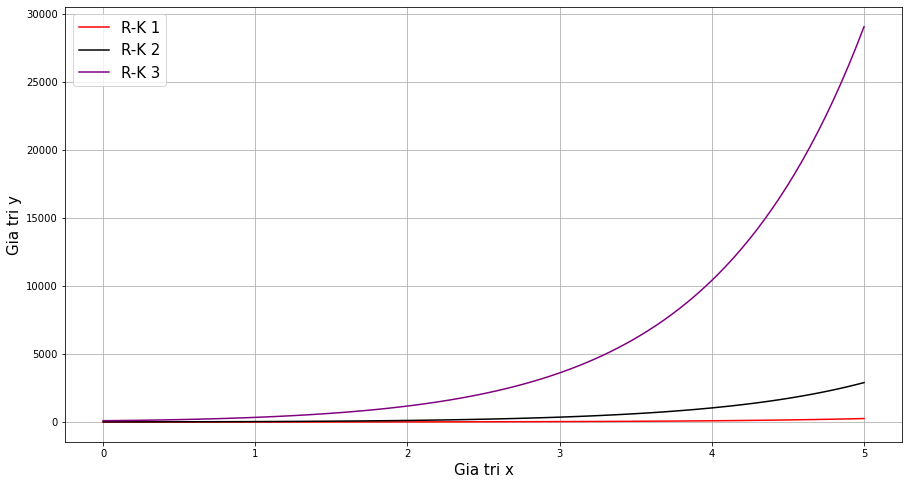

In [43]:
resultRunKutMotNac = RungeKuttaMotNac(x0, X, y0, N)
resultRunKutHaiNac = RungeKuttaHaiNac(x0, X, y0, N)
resultRunKutBaNac1 = RungeKuttaBaNac1(x0, X, y0, N)
resultRunKutBaNacHeun = RungeKuttaBaNacHeun(x0, X, y0, N)
resultRunKutBonNac = RungeKuttaBonNac(x0, X, y0, N)

c = math.pow(10, 1)

for i in range(0, N):
    resultRunKutBaNac1[i] *= c
    resultRunKutHaiNac[i] *= c
    resultRunKutBaNac1[i] *= c
    resultRunKutBaNacHeun[i] *= c
    resultRunKutBonNac[i] *= c

x = np.linspace(x0, X, N)

plt.plot(x, resultRunKutMotNac, 'red', label = 'R-K 1')
plt.plot(x, resultRunKutHaiNac, 'black', label = 'R-K 2')
plt.plot(x, resultRunKutBaNac1, 'purple', label = 'R-K 3')
# plt.plot(x, resultRunKutBaNacHeun, 'blue', label = 'R-K Heun')
# plt.plot(x, resultRunKutBonNac, 'orange', label = 'R-K 4')

# Nghiệm đúng với bài toán Cauchy trên là: y = 2e^x - x - 1
y_Real = []

for i in x:
    y_Real.append((2 * math.exp(i) - i - 1) * c)
    
# plt.plot(x, y_Real, 'green', label = 'Real')
# plt.plot(x, y_Real, '-ok', color = 'green', label = 'Real')

# Tăng kích thước hiển thị cho label
plt.legend(fontsize = 15)

# Tăng kích thước hiển thị cho xlabel và ylabel
plt.xlabel('Gia tri x', size = 15)
plt.ylabel('Gia tri y', size = 15)

plt.grid()
fig = plt.gcf()

fig.set_size_inches(15,8, forward = False)

plt.show()